# 0 - PRELIMINARIES

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(style="darkgrid")

In [3]:
SOURCE_DATA_PATH = '../source_data'
DERIVED_DATA_PATH = '../derived_data'

### Acquire

In [4]:
#commenting this out to avoid rerunning when executing whole ntbk.
# !curl -o ../source_data/ 'http://www.hosonline.org/surveys/hos/download/C16B_PUF.zip'
# !unzip ../source_data/C16B_PUF.zip -d ../source_data

!head -n 1 ../source_data/C16B_PUF.TXT

Each line is a string of length 105 (spaces represent missing data).  We need to parse each of the 83 fields from this string for each beneficiary record.  Afterwards, we'll save as csv to make i/o to pandas simpler in the future.

In [5]:
#commenting this out to avoid rerunning when executing whole ntbk.
#Parsed in accordance with HOS C16 PUF Data User Guide Field Positions available at: http://www.hosonline.org/surveys/hos/download/HOS_DUG_QIO_C16B.pdf
# import csv

# with open('../source_data/C16B_PUF.TXT') as txt_file:
#     records = txt_file.readlines()
#     to_comma_delimited = lambda line: [line[0:9]] + list(line[9:38]) + [line[38:40]] + [line[40:42]] + [line[42:44]] + list(line[44:71]) + [line[71:73]]+ list(line[73:89]) + [line[89:92]] + [line[92:94]] + [line[94:99]] + [line[99:102]] + [line[102:104]] + [line[104]]
#     transformed_records = [to_comma_delimited(line) for line in records]
#     with open('../source_data/C16B_PUF.csv', 'wb') as csv_file:
#         writer = csv.writer(csv_file)
#         writer.writerows(transformed_records)

Let's verify this worked.

In [6]:
!head -n 1 ../source_data/C16B_PUF.csv

Good.  So let's read it into pandas so we can begin our data inspection.

In [4]:
import os.path

columns = [u'ID', u'AGEGRP', u'RACE', u'GENDER', u'MRSTAT', u'EDUC', u'BMI', u'GENHTH', u'MODACT', u'CLMBSV', u'PACMPL', u'PLMTKW', u'EACMPL', u'ENTCRF', u'PNINTF', u'PCEFUL', u'ENERGY', u'BLSAD', u'SCLACT', u'ASHLTH', u'ASEHLTH', u'DIFBTH', u'DIFDRS', u'DIFEAT', u'DIFCHR', u'DIFWLK', u'DIFTOL', u'DIFPRM', u'DIFMON', u'DIFMED', u'PHYHTH', u'MENHTH', u'PORHTH', u'BLIND', u'DEAF', u'DIFCON', u'DIFERR', u'MEMINT', u'HIGHBP', u'ANGCAD', u'CHF', u'AMI', u'OTHHRT', u'STROKE', u'COPD_E', u'GI_ETC', u'ATHHIP', u'ATHHAN', u'OSTEOPO', u'SCIATC', u'DIABET', u'DEPRES', u'ANYCAN', u'COLNCA', u'LUNGCA', u'BRSTCA', u'PROSCA', u'OTHCAN', u'PNIACT', u'PNISOC', u'AVGPN', u'FELTNP', u'FELTSD', u'CMPHTH', u'SMKFRQ', u'URNLKG', u'URNMAG', u'URNDOC', u'URNTRT', u'PAOTLK', u'PAOADV', u'BALTLK', u'FELL12MO', u'BAL12MO', u'FALLTLK', u'OSTTEST', u'WHOCMP', u'SRVDSP', u'RNDNUM', u'PCTCMP', u'COHORT', u'PLREG', u'SVLANG']
data = pd.read_csv(os.path.join(SOURCE_DATA_PATH,'C16B_PUF.csv'), names=columns, na_values=' ', index_col='ID')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 303512 entries, C01000060 to C16303512
Data columns (total 82 columns):
AGEGRP      303512 non-null int64
RACE        257952 non-null float64
GENDER      298313 non-null float64
MRSTAT      266370 non-null float64
EDUC        264258 non-null float64
BMI         260916 non-null float64
GENHTH      280967 non-null float64
MODACT      276998 non-null float64
CLMBSV      270081 non-null float64
PACMPL      274803 non-null float64
PLMTKW      267458 non-null float64
EACMPL      274942 non-null float64
ENTCRF      266285 non-null float64
PNINTF      274624 non-null float64
PCEFUL      274263 non-null float64
ENERGY      272982 non-null float64
BLSAD       271400 non-null float64
SCLACT      274252 non-null float64
ASHLTH      274516 non-null float64
ASEHLTH     270802 non-null float64
DIFBTH      272450 non-null float64
DIFDRS      272532 non-null float64
DIFEAT      272052 non-null float64
DIFCHR      272122 non-null float64
DIFWLK      271913 no

# 1 - DATA INSPECTION

The data comes from an HOS Outcomes Survey from 2012. 

In [8]:
#TODO #graphic of data dictionary - pre clean

In [9]:
#TODO #graphic of data dictionary - post clean

###Examine

In [10]:
data.columns

Index([  u'AGEGRP',     u'RACE',   u'GENDER',   u'MRSTAT',     u'EDUC',
            u'BMI',   u'GENHTH',   u'MODACT',   u'CLMBSV',   u'PACMPL',
         u'PLMTKW',   u'EACMPL',   u'ENTCRF',   u'PNINTF',   u'PCEFUL',
         u'ENERGY',    u'BLSAD',   u'SCLACT',   u'ASHLTH',  u'ASEHLTH',
         u'DIFBTH',   u'DIFDRS',   u'DIFEAT',   u'DIFCHR',   u'DIFWLK',
         u'DIFTOL',   u'DIFPRM',   u'DIFMON',   u'DIFMED',   u'PHYHTH',
         u'MENHTH',   u'PORHTH',    u'BLIND',     u'DEAF',   u'DIFCON',
         u'DIFERR',   u'MEMINT',   u'HIGHBP',   u'ANGCAD',      u'CHF',
            u'AMI',   u'OTHHRT',   u'STROKE',   u'COPD_E',   u'GI_ETC',
         u'ATHHIP',   u'ATHHAN',  u'OSTEOPO',   u'SCIATC',   u'DIABET',
         u'DEPRES',   u'ANYCAN',   u'COLNCA',   u'LUNGCA',   u'BRSTCA',
         u'PROSCA',   u'OTHCAN',   u'PNIACT',   u'PNISOC',    u'AVGPN',
         u'FELTNP',   u'FELTSD',   u'CMPHTH',   u'SMKFRQ',   u'URNLKG',
         u'URNMAG',   u'URNDOC',   u'URNTRT',   u'PAOTLK',   u'P

In [52]:
data.head()

,AGEGRP,RACE,GENDER,MRSTAT,EDUC,BMI,GENHTH,MODACT,CLMBSV,PACMPL,...,BAL12MO,FALLTLK,OSTTEST,WHOCMP,SRVDSP,RNDNUM,PCTCMP,COHORT,PLREG,SVLANG
ID,,,,,,,,,,,,,,,,,,,,,
C01000060,3,NaN,2,1,1,1,4,1,1,4,...,1,1,1,1,M10,M1,97.3,C16,8,1
C01000361,3,1,1,1,2,1,3,2,3,2,...,2,2,2,1,T10,T1,98.7,C16,9,1
C01000455,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2,T31,T3,1.3,C16,10,1
C01000542,3,1,2,2,3,2,3,1,1,2,...,1,1,1,1,M10,M1,100.0,C16,4,1
C01000633,3,1,1,1,2,1,5,3,3,5,...,1,1,2,1,M10,M1,100.0,C16,9,1


###Prepare

In [11]:
data['DEPRES'] = data['DEPRES'].replace({1:True, 2:False})
data['SMKFRQ'] = data['SMKFRQ'].replace({1:True, 2:True, 3:False, 4:np.nan})

*Make PROFILE table: (1) demographics, (2) smoking (3) obesity (4) depression, (5) # CC*

In [12]:
data['MCC'] = (data[['HIGHBP', 'ANGCAD', 'CHF', 'AMI', 'OTHHRT', 'STROKE', 'COPD_E', 'GI_ETC', 'ATHHIP', 'ATHHAN', 'OSTEOPO', 'SCIATC', 'DIABET', 'COLNCA', 'LUNGCA', 'BRSTCA', 'PROSCA', 'OTHCAN']] == 1).sum(axis=1)

*Add Targets to PROFILE Table: (1) At-Risk, (2) Care Coordination Risk*

In [13]:
#At-Risk Metric pulled from Study: Bierman AS, Clancy CM.  Health Disparities among Older Women...
data['AT-RISK'] = data['GENHTH'] > 2.0

At Risk Metric was pulled from Study cited above.  But to check this out ourselves, let's look at the distribution of the data.  Historically, most care coordination programs have targeted patients with chronic conditions, which are costly, especially if managed poorly. According to a 2004 Partnership for Solutions report, 48% of the U.S. population has one or more chronic conditions; all their care represents 83% of total healthcare spending.14 Patients with chronic conditions visit their health care providers, fill prescriptions, and are hospitalized more often than the general population.14 Furthermore, patients with chronic conditions are more likely to experience poorly coordinated care, which can lead to adverse drug interactions, unnecessary or duplicate tests or procedures, conflicting information from multiple providers, and increased health care costs

In [14]:
##Naive CC metric (traditional care coordination indicator) based on lit from IHI Multiple Health + Social Needs
data['CC-NEED'] = data['MCC'] > 2.0

In [15]:
profile = data.loc[:,['AGEGRP',
 'RACE',
 'GENDER',
 'MRSTAT',
 'EDUC',
 'PLREG',
 'SVLANG',
 'BMI',
 'SMKFRQ',
 'DEPRES',
 'MCC',
 'AT-RISK',
 'CC-NEED']]

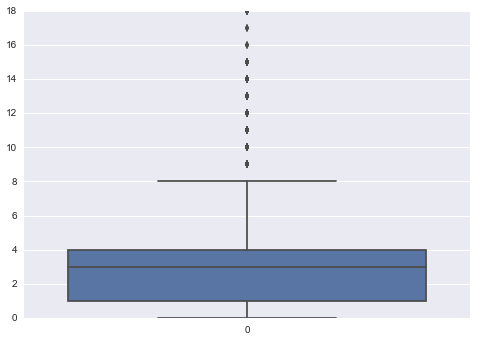

In [16]:
#not going to work because most of these are binary
ax = sns.boxplot(data=profile['MCC'])
# ax = sns.violinplot(data=profile['MCC'])

In [17]:
profile.head()

,AGEGRP,RACE,GENDER,MRSTAT,EDUC,PLREG,SVLANG,BMI,SMKFRQ,DEPRES,MCC,AT-RISK,CC-NEED
ID,,,,,,,,,,,,,
C01000060,3,NaN,2,1,1,8,1,1,0,0,5,True,True
C01000361,3,1,1,1,2,9,1,1,1,0,2,True,False
C01000455,3,NaN,NaN,NaN,NaN,10,1,NaN,NaN,NaN,0,False,False
C01000542,3,1,2,2,3,4,1,2,0,0,3,True,True
C01000633,3,1,1,1,2,9,1,1,0,0,5,True,True


In [18]:
#renames
new_col_names = {
 'AGEGRP':'AGE',
 'MRSTAT':'MARITALSTAT',
 'EDUC':'EDUCATION',
 'PLREG':'REGION',
 'SVLANG':'LANGUAGE',
 'BMI':'OBESE',
 'SMKFRQ':'SMOKER',
 'DEPRES':'DEPRESSION'}
profile = profile.rename(columns = new_col_names)
profile.head()

,AGE,RACE,GENDER,MARITALSTAT,EDUCATION,REGION,LANGUAGE,OBESE,SMOKER,DEPRESSION,MCC,AT-RISK,CC-NEED
ID,,,,,,,,,,,,,
C01000060,3,NaN,2,1,1,8,1,1,0,0,5,True,True
C01000361,3,1,1,1,2,9,1,1,1,0,2,True,False
C01000455,3,NaN,NaN,NaN,NaN,10,1,NaN,NaN,NaN,0,False,False
C01000542,3,1,2,2,3,4,1,2,0,0,3,True,True
C01000633,3,1,1,1,2,9,1,1,0,0,5,True,True


In [19]:
values_to_labels = {'AGE':{1:'<65', 2: '65 to 74', 3:'>74'}, 
                    'RACE':{1:'White', 2:'Black', 3:'Other'}, 
                    'GENDER':{1:'M', 2:'F'}, 
                    'MARITALSTAT':{1:'Married', 2:'Non-Married'}, 
                    'EDUCATION':{1:'Less than HS/GED', 2:'HS/GED', 3:'Greater than HS/GED'},
                    'REGION':{1:'Region 1 (Boston)', 2:'Region 2 (New York)', 3:'Region 3 (Philadelphia)', 4:'Region 4 (Atlanta)', 5:'Region 5 (Chicago)', 6:'Region 6 (Dallas)', 7:'Region 7 (Kansas City)', 8:'Region 8 (Denver)', 9:'Region 9 (San Francisco)', 10:'Region 10 (Seattle)'},
                    'LANGUAGE':{1:'English', 2:'Spanish', 3:np.nan, 4:'Chinese'},
                    'OBESE':{1:'Not obese (BMI < 30)', 2:'Obese (BMI > 30)'}
                    }

profile = profile.replace(values_to_labels)

In [20]:
profile.head()

,AGE,RACE,GENDER,MARITALSTAT,EDUCATION,REGION,LANGUAGE,OBESE,SMOKER,DEPRESSION,MCC,AT-RISK,CC-NEED
ID,,,,,,,,,,,,,
C01000060,>74,NaN,F,Married,Less than HS/GED,Region 8 (Denver),English,Not obese (BMI < 30),0,0,5,True,True
C01000361,>74,White,M,Married,HS/GED,Region 9 (San Francisco),English,Not obese (BMI < 30),1,0,2,True,False
C01000455,>74,NaN,NaN,NaN,NaN,Region 10 (Seattle),English,NaN,NaN,NaN,0,False,False
C01000542,>74,White,F,Non-Married,Greater than HS/GED,Region 4 (Atlanta),English,Obese (BMI > 30),0,0,3,True,True
C01000633,>74,White,M,Married,HS/GED,Region 9 (San Francisco),English,Not obese (BMI < 30),0,0,5,True,True


*Look for general patterns in data spread*

In [21]:
profile.describe()

,SMOKER,DEPRESSION,MCC,AT-RISK,CC-NEED
count,269228.000000,268673.000000,303512.000000,303512,303512
mean,0.133712,0.261489,2.841835,0.6493186,0.5022174
std,0.340343,0.439446,2.313805,0.4771841,0.4999959
min,0.000000,0.000000,0.000000,False,False
25%,0.000000,0.000000,1.000000,0,0
50%,0.000000,0.000000,3.000000,1,1
75%,0.000000,1.000000,4.000000,1,1
max,1.000000,1.000000,18.000000,True,True


In [64]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

def convert_labels(data):
    for col_name in data.columns:
        col = data[col_name]
        if col.dtype == 'O':
            labels = col.unique()
            le.fit(labels)
            data[col_name] = le.transform(col)
    return data

In [65]:
profiles_converted = convert_labels(profile.dropna())

/Users/ceslee-work/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [66]:
profiles_converted.head()

,AGE,RACE,GENDER,MARITALSTAT,EDUCATION,REGION,LANGUAGE,OBESE,SMOKER,DEPRESSION,MCC,AT-RISK,CC-NEED
ID,,,,,,,,,,,,,
C01000361,2,2,1,0,1,9,1,0,1,0,2,True,False
C01000542,2,2,0,1,0,4,1,1,0,0,3,True,True
C01000633,2,2,1,0,1,9,1,0,0,0,5,True,True
C01000819,2,2,0,1,2,7,1,0,0,0,4,True,True
C01000988,2,2,1,1,2,0,1,0,0,0,4,True,True


*Make NEEDS table: (1) roll-up additional health questions that remain: ADLs (Activities of Daily Living), etc.

In [67]:
#list was somewhat cherry picked so come back to left out vars.
# needs = data.loc[:,['SCLACT', 'DIFBTH', 'DIFDRS', 'DIFEAT', 'DIFCHR', 'DIFWLK', 'DIFTOL', 'DIFPRM', 'DIFMON', 'DIFMED', 'BLIND', 'DEAF', 'DIFCON', 'DIFERR', 'MEMINT', 'PNIACT']]

emotional = (data.loc[:, ['FELTNP', 'FELTSD']]).replace({1:False, 2:True, 3:True, 4:True})
pain = data['PNIACT'].replace({1:False, 2:True, 3:True, 4:True, 5:True})
social = data['SCLACT'].replace({1:True, 2:True, 3:True, 4:True, 5:False})
adl_1 = data.loc[:, ['DIFBTH', 'DIFDRS', 'DIFEAT', 'DIFCHR', 'DIFWLK', 'DIFTOL', 'DIFPRM', 'DIFMON', 'DIFMED']].replace({1:False, 2:True, 3:True})
adl_2 = data.loc[:, ['BLIND', 'DEAF', 'DIFCON', 'DIFERR']].replace({1:True, 2:False})
needs = pd.concat([emotional, pain, social, adl_1, adl_2], axis=1)

In [68]:
needs.head()

,FELTNP,FELTSD,PNIACT,SCLACT,DIFBTH,DIFDRS,DIFEAT,DIFCHR,DIFWLK,DIFTOL,DIFPRM,DIFMON,DIFMED,BLIND,DEAF,DIFCON,DIFERR
ID,,,,,,,,,,,,,,,,,
C01000060,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0
C01000361,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
C01000455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C01000542,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,1
C01000633,1,1,1,1,0,1,0,1,1,0,1,0,1,0,1,1,1


*Make WELLNESS table: (1) roll-up 8 questions into 6 health domains.

In [69]:
data.columns

Index([  u'AGEGRP',     u'RACE',   u'GENDER',   u'MRSTAT',     u'EDUC',
            u'BMI',   u'GENHTH',   u'MODACT',   u'CLMBSV',   u'PACMPL',
         u'PLMTKW',   u'EACMPL',   u'ENTCRF',   u'PNINTF',   u'PCEFUL',
         u'ENERGY',    u'BLSAD',   u'SCLACT',   u'ASHLTH',  u'ASEHLTH',
         u'DIFBTH',   u'DIFDRS',   u'DIFEAT',   u'DIFCHR',   u'DIFWLK',
         u'DIFTOL',   u'DIFPRM',   u'DIFMON',   u'DIFMED',   u'PHYHTH',
         u'MENHTH',   u'PORHTH',    u'BLIND',     u'DEAF',   u'DIFCON',
         u'DIFERR',   u'MEMINT',   u'HIGHBP',   u'ANGCAD',      u'CHF',
            u'AMI',   u'OTHHRT',   u'STROKE',   u'COPD_E',   u'GI_ETC',
         u'ATHHIP',   u'ATHHAN',  u'OSTEOPO',   u'SCIATC',   u'DIABET',
         u'DEPRES',   u'ANYCAN',   u'COLNCA',   u'LUNGCA',   u'BRSTCA',
         u'PROSCA',   u'OTHCAN',   u'PNIACT',   u'PNISOC',    u'AVGPN',
         u'FELTNP',   u'FELTSD',   u'CMPHTH',   u'SMKFRQ',   u'URNLKG',
         u'URNMAG',   u'URNDOC',   u'URNTRT',   u'PAOTLK',   u'P

In [70]:
wellness = data.loc[:,['PNINTF', 'GENHTH', 'ENERGY', 'SCLACT']]
#calc new cols
wellness['Physical Functioning'] = ((3 - data['MODACT']) + (3 - data['CLMBSV']))/2
wellness['Role Physical'] = (data['PACMPL'] + data['PLMTKW'])/2
wellness['Role Emotional'] = (data['EACMPL'] + data['ENTCRF'])/2
#reorder responses so that biggest gaps/needs are ascending ordered
wellness['Mental Health'] = (data['PCEFUL'] + (6 - data['BLSAD']))/2
wellness['SCLACT'] = (5 - wellness['SCLACT'])

wellness.head()

,PNINTF,GENHTH,ENERGY,SCLACT,Physical Functioning,Role Physical,Role Emotional,Mental Health
ID,,,,,,,,
C01000060,3,4,5,1,2.0,4.0,3,2.5
C01000361,2,3,4,0,0.5,1.5,1,1.0
C01000455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C01000542,2,3,6,1,2.0,2.5,1,1.0
C01000633,5,5,6,3,0.0,5.0,5,4.0


In [71]:
#reorder cols + renames
new_col_names = {
 'Physical Functioning':'Physical Functioning',
 'Role Physical':'Role Physical',
 'PNINTF': 'Bodily Pain',
 'GENHTH': 'General Health',
 'ENERGY': 'Vitality',
 'SCLACT':'Social Functioning',
 'Role Emotional':'Role Emotional',
 'Mental Health':'Mental Health'
 }
wellness = wellness.rename(columns = new_col_names)

#scale

In [72]:
wellness.head()

,Bodily Pain,General Health,Vitality,Social Functioning,Physical Functioning,Role Physical,Role Emotional,Mental Health
ID,,,,,,,,
C01000060,3,4,5,1,2.0,4.0,3,2.5
C01000361,2,3,4,0,0.5,1.5,1,1.0
C01000455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C01000542,2,3,6,1,2.0,2.5,1,1.0
C01000633,5,5,6,3,0.0,5.0,5,4.0


# 2 - EXPLORE BASIC STATS

###Quality Control

*Take a look at measures of central tendancy and spread through boxplot*

**Profile Table**

In [73]:
profile.describe()

,SMOKER,DEPRESSION,MCC,AT-RISK,CC-NEED
count,269228.000000,268673.000000,303512.000000,303512,303512
mean,0.133712,0.261489,2.841835,0.6493186,0.5022174
std,0.340343,0.439446,2.313805,0.4771841,0.4999959
min,0.000000,0.000000,0.000000,False,False
25%,0.000000,0.000000,1.000000,0,0
50%,0.000000,0.000000,3.000000,1,1
75%,0.000000,1.000000,4.000000,1,1
max,1.000000,1.000000,18.000000,True,True


In [22]:
profile.to_csv(os.path.join(DERIVED_DATA_PATH,'C16B_PUF_cleaned_profile.csv'))

**Needs Table**

Note: Needs are binary features

In [75]:
needs.describe()

,FELTNP,FELTSD,PNIACT,SCLACT,DIFBTH,DIFDRS,DIFEAT,DIFCHR,DIFWLK,DIFTOL,DIFPRM,DIFMON,DIFMED,BLIND,DEAF,DIFCON,DIFERR
count,265705.000000,264746.000000,269104.000000,274252.000000,272450.000000,272532.000000,272052.000000,272122.000000,271913.000000,271991.000000,272111.000000,271318.000000,271245.000000,270715.000000,270575.000000,268915.000000,269269.000000
mean,0.381280,0.323771,0.633807,0.527646,0.205950,0.172130,0.075056,0.269596,0.369420,0.124883,0.265337,0.172768,0.127988,0.123166,0.160957,0.226681,0.232340
std,0.485702,0.467915,0.481764,0.499236,0.404395,0.377494,0.263481,0.443751,0.482649,0.330587,0.441513,0.378047,0.334077,0.328629,0.367492,0.418685,0.422326
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [76]:
needs.to_csv(os.path.join(DERIVED_DATA_PATH,'C16B_PUF_cleaned_needs.csv'))

In [77]:
#plot T vs F counts for each feature
#plot mean

**Wellness Table**

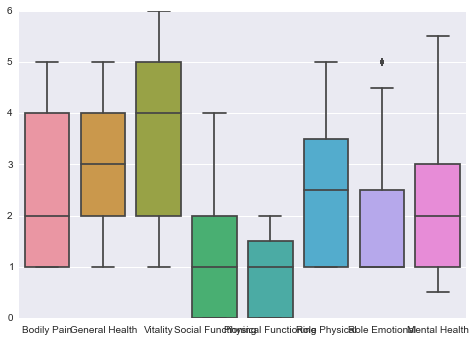

In [78]:
ax = sns.boxplot(data=wellness)

Note: Values Ascending from not a problem at all to all the time

In [79]:
wellness.to_csv(os.path.join(DERIVED_DATA_PATH,'C16B_PUF_cleaned_wellness.csv'))

*Distribution of Data Points*

In [80]:
# profiles.count().plot(kind='bar', figsize=(14, 2.5))

*Checking for table completeness completeness (Presence of missing values)*

*Quick bivariate analysis*

/Users/ceslee-work/anaconda/lib/python2.7/site-packages/seaborn/linearmodels.py:1283: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
/Users/ceslee-work/anaconda/lib/python2.7/site-packages/seaborn/linearmodels.py:1349: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


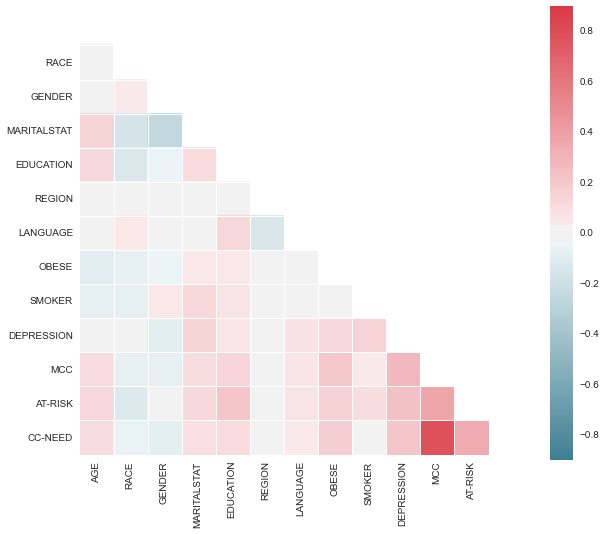

In [40]:
f, ax = plt.subplots(figsize=(9, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.corrplot(profiles_converted, annot=False, sig_stars=False,
             diag_names=False, cmap=cmap, ax=ax)
f.tight_layout()

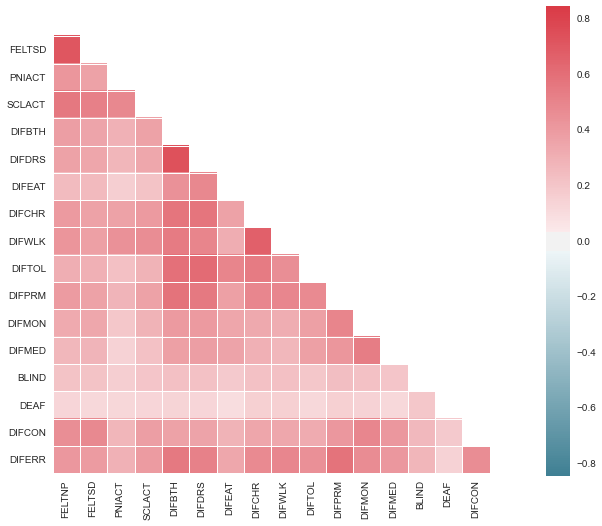

In [41]:
f, ax = plt.subplots(figsize=(9, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.corrplot(needs, annot=False, sig_stars=False,
             diag_names=False, cmap=cmap, ax=ax)
f.tight_layout()

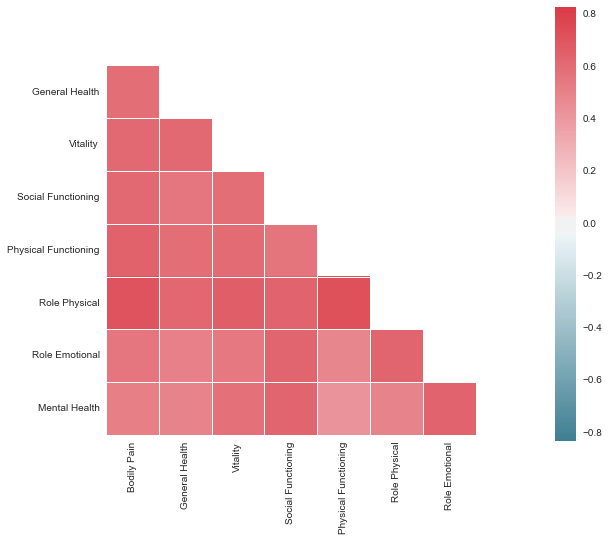

In [42]:
f, ax = plt.subplots(figsize=(9, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.corrplot(wellness, annot=False, sig_stars=False,
             diag_names=False, cmap=cmap, ax=ax)
f.tight_layout()

In [43]:
#binary data correlation, overlap